<a href="https://colab.research.google.com/github/ChingizIbnVaxob/data-science-practices/blob/main/04.04.2024/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k-NN classification

In [1]:
import pandas as pd
import numpy as np

In [2]:
url = "https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/breast-cancer.csv"
df = pd.read_csv(url)
df.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
193,875263,M,12.34,26.86,81.15,477.4,0.10340,0.13530,0.10850,0.04562,...,15.65,39.34,101.70,768.9,0.1785,0.4706,0.44250,0.14590,0.3215,0.12050
509,915460,M,15.46,23.95,103.80,731.3,0.11830,0.18700,0.20300,0.08520,...,17.11,36.33,117.70,909.4,0.1732,0.4967,0.59110,0.21630,0.3013,0.10670
108,86355,M,22.27,19.67,152.80,1509.0,0.13260,0.27680,0.42640,0.18230,...,28.40,28.01,206.80,2360.0,0.1701,0.6997,0.96080,0.29100,0.4055,0.09789
230,881972,M,17.05,19.08,113.40,895.0,0.11410,0.15720,0.19100,0.10900,...,19.59,24.89,133.50,1189.0,0.1703,0.3934,0.50180,0.25430,0.3109,0.09061
365,901088,M,20.44,21.78,133.80,1293.0,0.09150,0.11310,0.09799,0.07785,...,24.31,26.37,161.20,1780.0,0.1327,0.2376,0.27020,0.17650,0.2609,0.06735
98,862485,B,11.60,12.84,74.34,412.6,0.08983,0.07525,0.04196,0.03350,...,13.06,17.16,82.96,512.5,0.1431,0.1851,0.19220,0.08449,0.2772,0.08756
158,871122,B,12.06,12.74,76.84,448.6,0.09311,0.05241,0.01972,0.01963,...,13.14,18.41,84.08,532.8,0.1275,0.1232,0.08636,0.07025,0.2514,0.07898
335,89742801,M,17.06,21.00,111.80,918.6,0.11190,0.10560,0.15080,0.09934,...,20.99,33.15,143.20,1362.0,0.1449,0.2053,0.39200,0.18270,0.2623,0.07599
533,91930402,M,20.47,20.67,134.70,1299.0,0.09156,0.13130,0.15230,0.10150,...,23.23,27.15,152.00,1645.0,0.1097,0.2534,0.30920,0.16130,0.3220,0.06386
100,862717,M,13.61,24.98,88.05,582.7,0.09488,0.08511,0.08625,0.04489,...,16.99,35.27,108.60,906.5,0.1265,0.1943,0.31690,0.11840,0.2651,0.07397


In [3]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df['diagnosis'] = labelencoder.fit_transform(df['diagnosis'].values)
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [4]:
df.drop(columns='id', inplace=True)

In [5]:
corr_matrix = df.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,0.012838,0.567134,0.008303,0.556141,0.548236,0.067016,0.292999,0.253730,0.408042,0.006522,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,0.311631,0.679090,0.097317,0.674172,0.735864,0.222600,0.206000,0.194204,0.376169,0.104321,0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,0.023389,0.236702,0.302418,0.293464,0.071401,0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,0.261477,0.691765,0.086761,0.693135,0.744983,0.202694,0.250744,0.228082,0.407217,0.081629,0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,0.283110,0.732562,0.066280,0.726628,0.800086,0.166777,0.212583,0.207660,0.372320,0.072497,0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [6]:
df.corrwith(df['diagnosis']).abs().sort_values(ascending=False)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
smoothness_se              0

# MLga tayyorlash

In [7]:
X = df.drop('diagnosis', axis=1).values
y = df['diagnosis']

In [34]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

# ML

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

#k-NN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5) # value of k

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [10]:
y_predict = knn.predict(X_test)

# Baholash

**Jaccard index**

In [11]:
from sklearn.metrics import jaccard_score

jaccard_score(y_test, y_predict)

0.8958333333333334

**Confuion** **matrix**

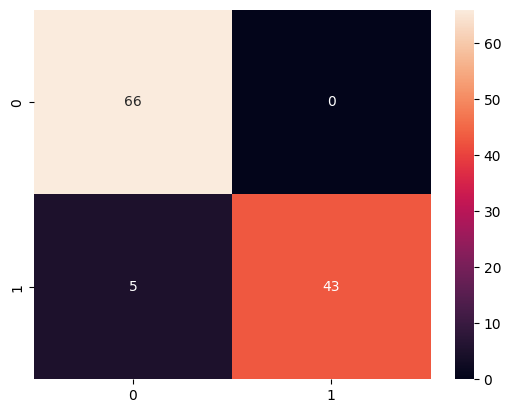

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot  as plt

sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [13]:
confusion_matrix(y_test, y_predict)

array([[66,  0],
       [ 5, 43]])

Precision, recall, F1

In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)

print(f"{precision=}\n{recall=}\n{f1=}\n{accuracy=}")

precision=1.0
recall=0.8958333333333334
f1=0.945054945054945
accuracy=0.956140350877193


In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        66
           1       1.00      0.90      0.95        48

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114





> Bizning bu datasetimizda ma'lumot juda ham kam xisoblanadi shuning uchun kichik hajmdagi datasetlarga **Cross-validation**dan foydalangan maqul.



# **Cross-validation**

In [16]:
#cross validation

from sklearn.model_selection import cross_val_predict
predict = cross_val_predict(estimator= knn, X=X, y=y, cv=5)

#modelni baholash
from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       357
           1       0.97      0.93      0.95       212

    accuracy                           0.96       569
   macro avg       0.97      0.96      0.96       569
weighted avg       0.96      0.96      0.96       569



# Eng yaxshi k ni topish!

`for` yordamida

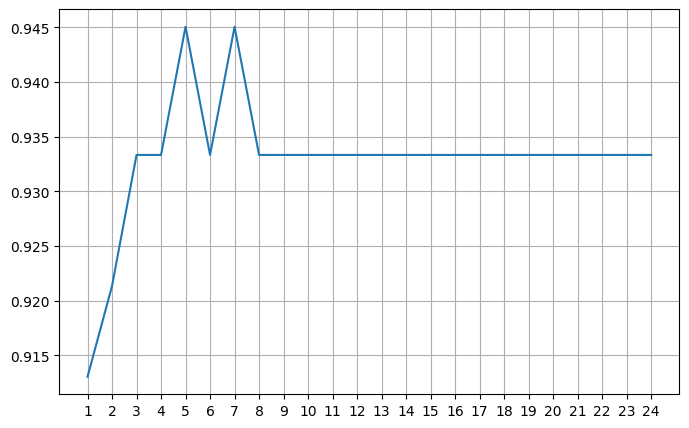

In [17]:
f1= []

for k in range(1, 25):
  knn = KNeighborsClassifier(n_neighbors=k) # value of k
  knn.fit(X_train, y_train)
  y_predict = knn.predict(X_test)
  f1.append(f1_score(y_test, y_predict))

plt.figure(figsize=(8,5))
plt.plot(range(1,25), f1)
plt.xticks(range(1, 25))
plt.grid()
plt.show()

**Grid search usuli**

In [28]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 15)}
knn_gscv = GridSearchCV(knn, param_grid, cv=5)

knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=24),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [29]:
knn_gscv.cv_results_['rank_test_score']

array([14, 13, 12, 10,  7,  3,  2,  4,  1,  4,  8,  8,  4, 11],
      dtype=int32)

In [30]:
knn_gscv.best_params_

{'n_neighbors': 9}

In [31]:
knn_gscv.best_score_

0.968390001552554

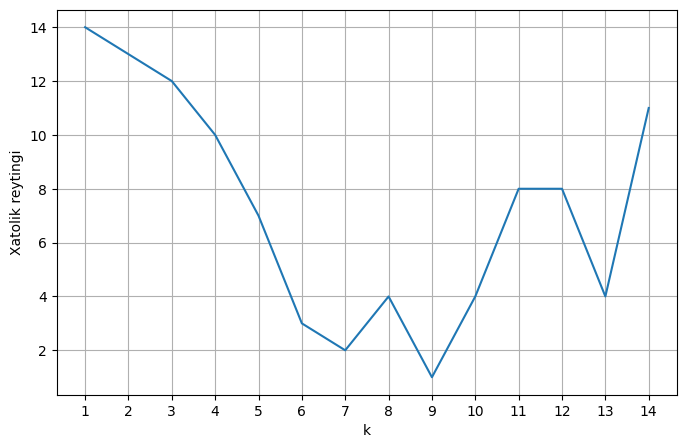

In [32]:
plt.figure(figsize=(8,5))
plt.plot(param_grid['n_neighbors'], knn_gscv.cv_results_['rank_test_score'])
plt.xticks(param_grid['n_neighbors'])
plt.xlabel("k")
plt.ylabel("Xatolik reytingi")
plt.grid()
plt.show()